In [39]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patheffects as path_effects
import seaborn as sns

# Data Visualization

### Load the data

In [40]:
df = pd.read_csv('dataset/spotify_songs_restructured_cleaned.csv', sep=',')
df

,track_name,track_artist,track_popularity,track_album_name,track_album_release_date,playlist_genre,danceability,energy,key,loudness,speechiness,liveness,valence,tempo,duration_ms,popularity_category,tempo_category,loudness_category,release_month
0,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66.00000,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,pop,0.748,0.916000,6.000000,-2.634000,0.058300,0.0653,0.509883,122.036,194754.0,Medium Popularity,Fast,Loud,June
1,Memories - Dillon Francis Remix,Maroon 5,67.00000,Memories (Dillon Francis Remix),2019-12-13,pop,0.726,0.815000,11.000000,-4.969000,0.037300,0.3570,0.509883,99.972,162600.0,Medium Popularity,Slow,Loud,December
2,All the Time - Don Diablo Remix,Zara Larsson,42.45689,All the Time (Don Diablo Remix),2019-07-05,pop,0.675,0.931000,1.000000,-3.432000,0.074200,0.1100,0.613000,124.008,176616.0,Medium-Low Popularity,Fast,Loud,July
3,Someone You Loved - Future Humans Remix,Lewis Capaldi,69.00000,Someone You Loved (Future Humans Remix),2019-03-05,pop,0.650,0.833000,1.000000,-4.672000,0.035900,0.0833,0.509883,123.976,189052.0,Medium Popularity,Fast,Loud,March
4,Beautiful People (feat. Khalid) - Jack Wins Remix,Ed Sheeran,67.00000,Beautiful People (feat. Khalid) [Jack Wins Remix],2019-07-11,pop,0.675,0.698571,8.000000,-5.385000,0.127000,0.1430,0.585000,124.982,163049.0,Medium Popularity,Fast,Moderate,July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20965,Wasted,Tiësto,42.45689,Wasted,2014-04-22,edm,0.645,0.832000,2.000000,-5.595000,0.029400,0.1990,0.375000,112.028,188371.0,Medium-Low Popularity,Moderate,Moderate,April
20966,Many Ways - Radio Edit,Ferry Corsten feat. Jenny Wahlstrom,27.00000,Many Ways,2013,edm,0.581,0.640000,5.000000,-8.367000,0.106711,0.5720,0.288000,128.001,196993.0,Low Popularity,Fast,Moderate,NaN
20967,City Of Lights - Official Radio Edit,Lush & Simon,42.00000,City Of Lights (Vocal Mix),2014-04-28,edm,0.428,0.922000,5.386847,-1.814000,0.093600,0.0668,0.210000,128.170,204375.0,Medium-Low Popularity,Fast,Loud,April
20968,Sweet Surrender - Radio Edit,Starkillers,14.00000,Sweet Surrender (Radio Edit),2014-04-21,edm,0.529,0.821000,6.000000,-6.722152,0.048100,0.1500,0.436000,127.989,210112.0,Low Popularity,Fast,Moderate,April


### Popularity Distribution over genres

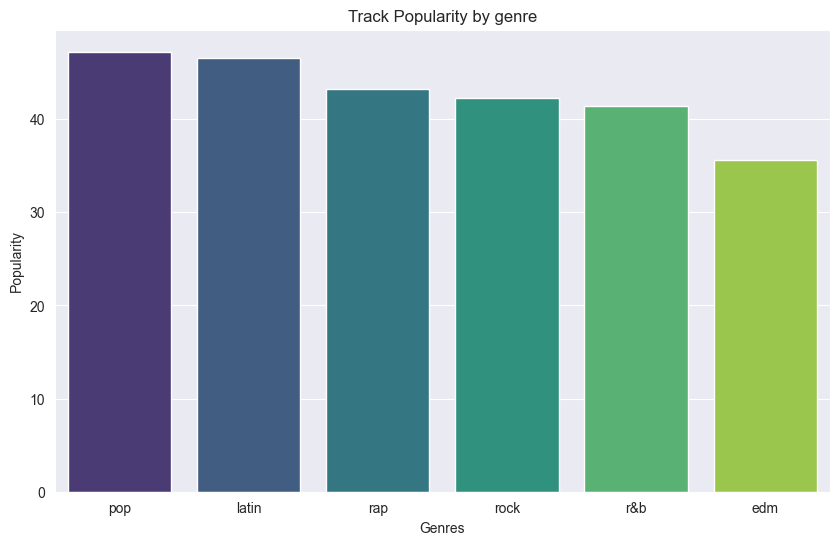

In [41]:
data = df.groupby('playlist_genre')['track_popularity'].mean().sort_values(ascending=False)

sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))

sns.barplot(x=data.index, y=data.values, hue=data.index, palette='viridis', legend=False)

plt.title('Track Popularity by genre')
plt.xlabel('Genres')
plt.ylabel('Popularity')

plt.show()

### Popularity Distribution over months

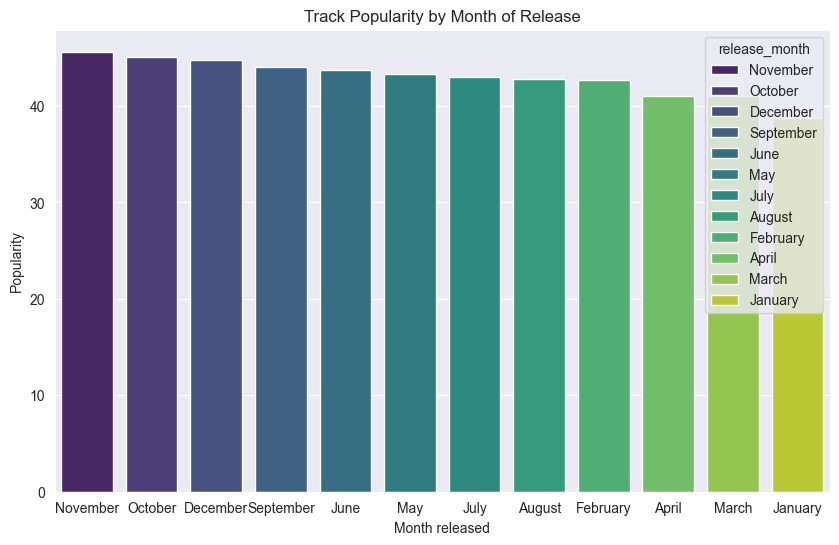

In [42]:
data = df.groupby('release_month')['track_popularity'].mean().sort_values(ascending=False)

sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))

sns.barplot(x=data.index, y=data.values, hue=data.index, palette='viridis', legend=True
            )

plt.title('Track Popularity by Month of Release')
plt.xlabel('Month released')
plt.ylabel('Popularity')

plt.show()

### Total Tracks per Genre

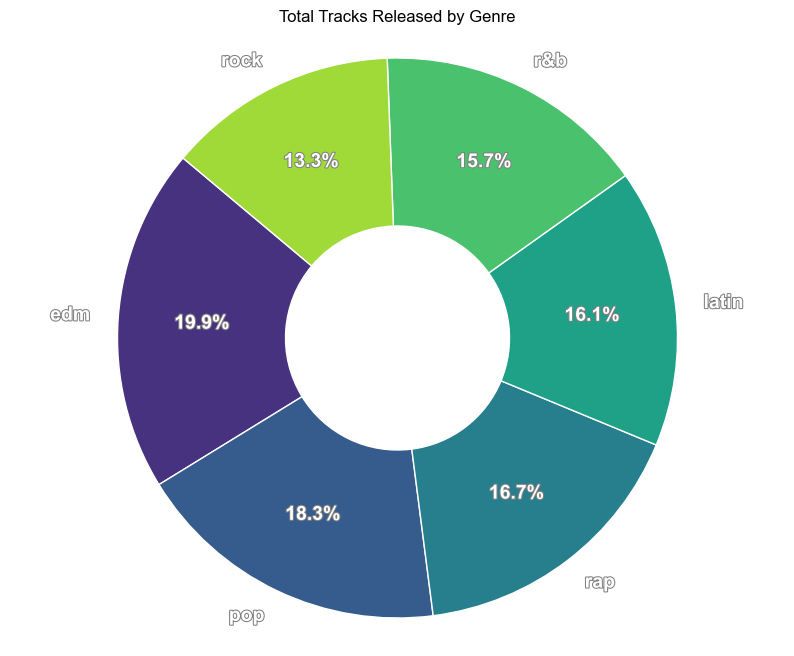

In [43]:
df = pd.read_csv('dataset/spotify_songs_cleaned.csv', sep=',')

genre_counts = df['playlist_genre'].value_counts()

def add_outline(text, linewidth=1.5, foreground='grey'):
    text.set_path_effects([path_effects.Stroke(linewidth=linewidth, foreground=foreground), path_effects.Normal()])

# Plot the donut chart
fig, ax = plt.subplots(figsize=(10, 8))

wedges, texts, autotexts = ax.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140,
                                  colors=sns.color_palette('viridis', len(genre_counts)),
                                  textprops={'color': 'white', 'weight': 'bold', 'fontsize': 14},
                                  wedgeprops={'width': 0.6}, pctdistance=0.7)

# Add outline to the text
for text in texts + autotexts:
    add_outline(text)

plt.title('Total Tracks Released by Genre', color='black')
plt.axis('equal')
plt.show()

### Tempo Distribution by Year

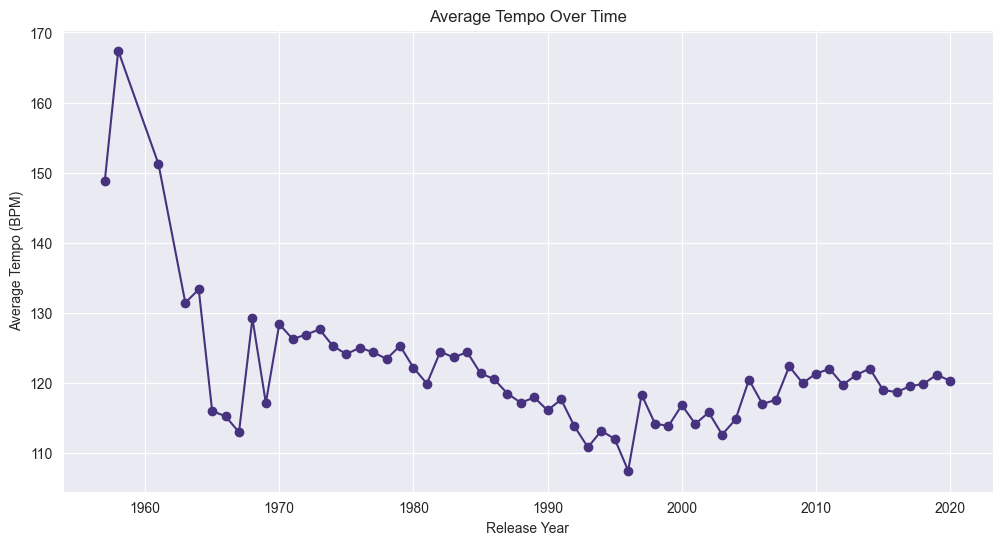

In [44]:
df['track_album_release_date'] = pd.to_datetime(df['track_album_release_date'])

colors=sns.color_palette('viridis', len(genre_counts))

tempo_over_time = df.groupby(df['track_album_release_date'].dt.year)['tempo'].mean()


plt.figure(figsize=(12, 6))
tempo_over_time.plot(kind='line', marker='o', color=colors)
plt.title('Average Tempo Over Time')
plt.xlabel('Release Year')
plt.ylabel('Average Tempo (BPM)')
plt.show()

### Popularity Categories Distribution 

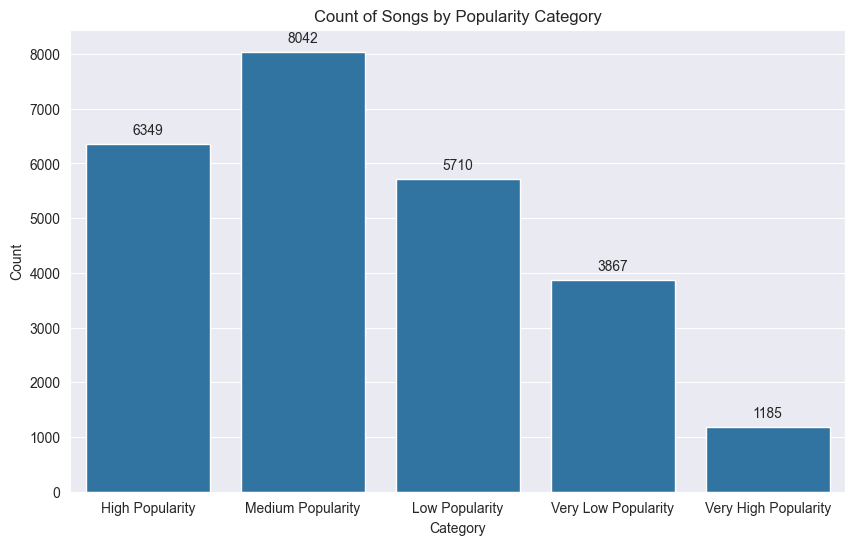

In [45]:
category_counts = df['popularity_category'].value_counts()

plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='popularity_category')
plt.title('Count of Songs by Popularity Category')
plt.xlabel('Category')
plt.ylabel('Count')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

### Tempo Categories Distribution

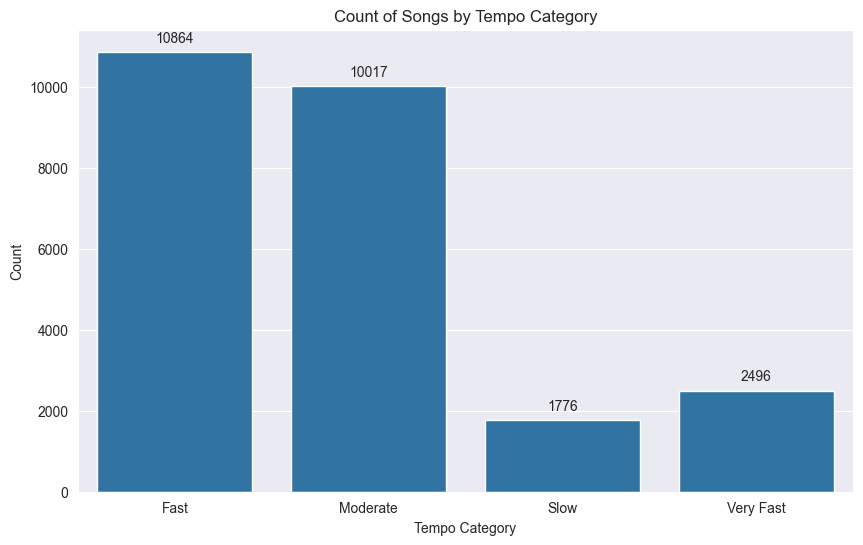

In [46]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='tempo_category')
plt.title('Count of Songs by Tempo Category')
plt.xlabel('Tempo Category')
plt.ylabel('Count')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

### Loudness Categories Distribution

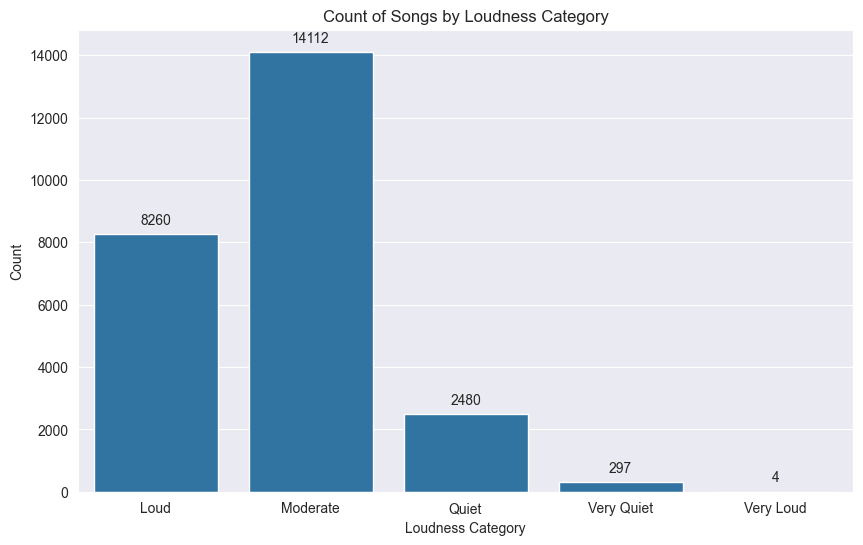

In [47]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='loudness_category')
plt.title('Count of Songs by Loudness Category')
plt.xlabel('Loudness Category')
plt.ylabel('Count')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()